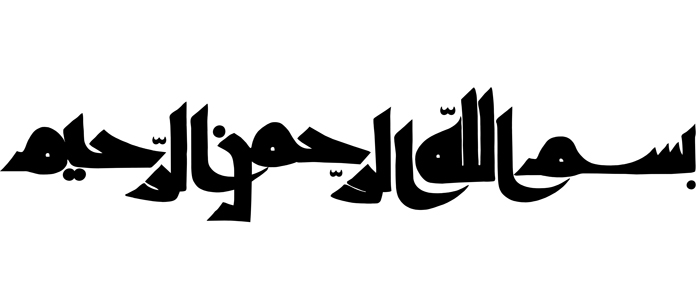

## موضوع اول: دسته بندی تصاویر
## نام درس: هوش مصنوعی و سیستم های خبره
### نام استاد: دکتر غضنفری - دکتر حضرتی
### نام دانشجو :سعید صرافزاده جهرمی - علیرضا فاضلی کیا


# **Loading Dataset and Displaying Images of Cats and Dogs**

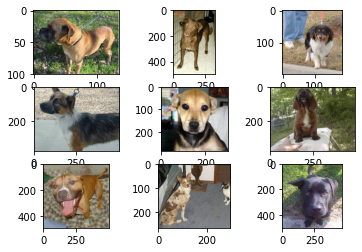

In [4]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = "D:/main_dataset_dogs_vs_cats/"
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

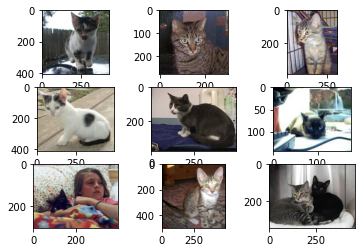

In [5]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = "D:/main_dataset_dogs_vs_cats/"
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# **Select Standardized Photo Size**

### **Import necessary libraries**

In [1]:
# load dogs vs cats dataset, reshape and save to a new file
import keras
import os
from os import listdir #listdir() function print a list of names
                       #of all the files present in the specified path.
                       #listdir() method can also be used if we want to
                       #print the list of files present in the current working
                       #directory (where the program is present).
from numpy import asarray
from numpy import save
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

### **Pre-Process Photo Sizes**

In [7]:
# define location of dataset
folder = "D:/main_dataset_dogs_vs_cats/"
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('dog'):
		output = 1.0
	# load image with load_img()
	photo = load_img(folder + file, target_size=(200, 200))
	#   convert to numpy array ,Using the img_to_array () function, 
    #   we convert the image from PIL format to Numpy format in the 
    #   format (width x height x channels) 
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

(8007, 200, 200, 3) (8007,)


#### **The prepared data can be loaded directly; for example:**

In [8]:
# load and confirm the shape
from numpy import load
photos = load('dogs_vs_cats_photos.npy')
labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

(8007, 200, 200, 3) (8007,)


# **Pre-Process Photos into Standard Directories**

#### First, we need to create the directory structure as follows:

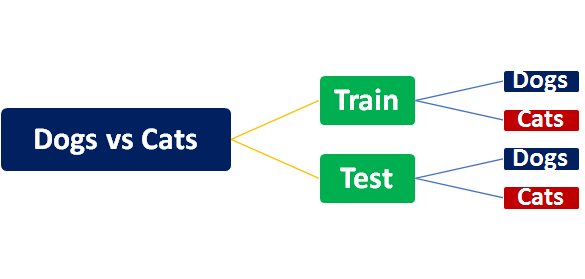

### **Import necessary libraries**

In [2]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

### **create directories**

In [10]:
# create directories using the makedirs() function and use a loop
dataset_home = "D:/dataset_dogs_vs_cats/"
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)

### **organize dataset into a useful structure**
#### randomly decide 25% test dataset and 75% train dataset

In [11]:
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = "D:/main_dataset_dogs_vs_cats/"
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = "train/"
	if random() < val_ratio:
		dst_dir = "test/"
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

# **Develop CNN Model**

# **baseline model with Three Block VGG Model**

In [22]:
# baseline model with dropout for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterator
	train_it = datagen.flow_from_directory('D:/dataset_dogs_vs_cats/train/', 
		class_mode='binary', batch_size=64, target_size=(200, 200))          # The address of the folder where the train data is stored
	test_it = datagen.flow_from_directory('D:/dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))          # The address of the folder where the test data is stored
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 

In [102]:
# entry point, run the test harness
run_test_harness()

Found 5979 images belonging to 2 classes.
Found 2028 images belonging to 2 classes.
> 72.929


#### Line Plots of Loss and Accuracy Learning Curves for the Baseline Model With Three VGG Block on the Dogs and Cats Dataset

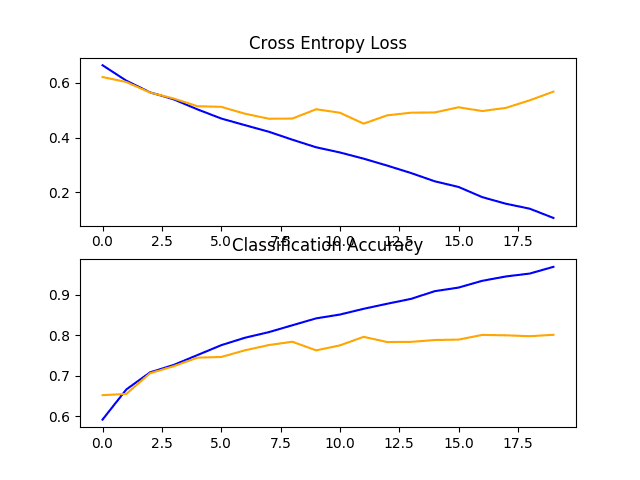

# **baseline model with data augmentation**

In [32]:

# baseline model with data augmentation for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory('D:/dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory('D:/dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 

In [33]:
# entry point, run the test harness
run_test_harness()

Found 5979 images belonging to 2 classes.
Found 2028 images belonging to 2 classes.
> 80.917


#### Line Plots of Loss and Accuracy Learning Curves for the Baseline Model With Data Augmentation on the Dogs and Cats Dataset

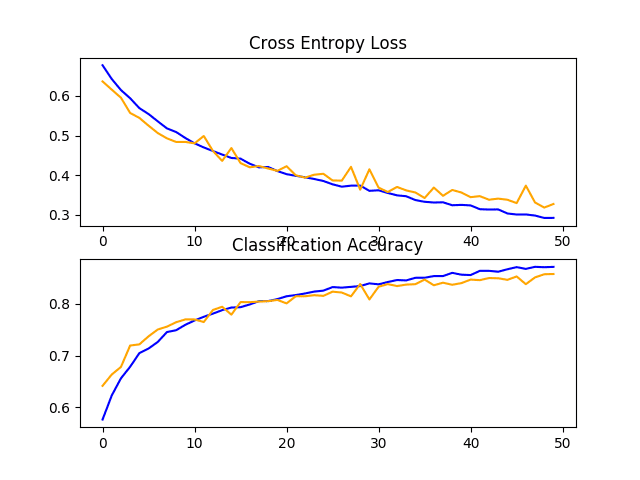

# **Explore Transfer Learning with VGG16()**

In [1]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('D:/dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('D:/dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Found 5979 images belonging to 2 classes.
Found 2028 images belonging to 2 classes.
Epoch 1/10
94/94 [==============================] - 849s 9s/step - loss: 0.6172 - accuracy: 0.9466 - val_loss: 0.0820 - val_accuracy: 0.9670
Epoch 2/10
94/94 [==============================] - 755s 8s/step - loss: 0.0234 - accuracy: 0.9900 - val_loss: 0.0742 - val_accuracy: 0.9763
Epoch 3/10
94/94 [==============================] - 748s 8s/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0801 - val_accuracy: 0.9753
Epoch 4/10
94/94 [==============================] - 764s 8s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0847 - val_accuracy: 0.9753
Epoch 5/10
94/94 [==============================] - 864s 9s/step - loss: 9.7627e-04 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9763
Epoch 6/10
94/94 [==============================] - 829s 9s/step - loss: 6.7199e-04 - accuracy: 1.0000 - val_loss: 0.0883 - val_accuracy: 0.9763
Epoch 7/10
94/94 [==============================] - 1221s 13s/

#### Line Plots of Loss and Accuracy Learning Curves for the **VGG16 Transfer Learning Model** on the Dogs and Cats Dataset


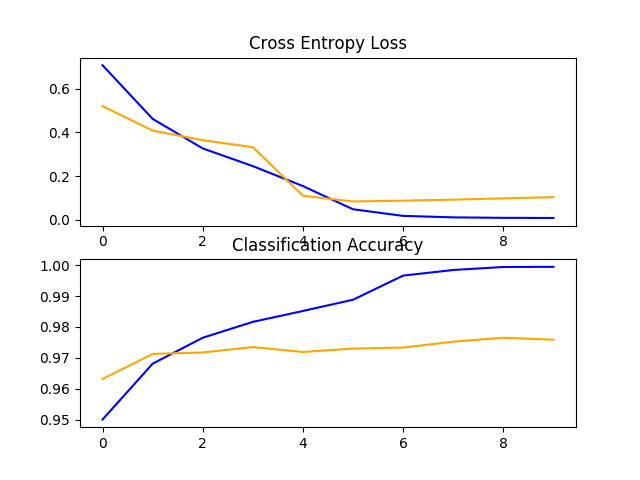

# **Finalize the Model and Make Predictions**

### **Prepare Final Dataset**

In [ ]:
# save model
model.save('final_model.h5')

In [34]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
# create directories
dataset_home = "D:/finalize_dogs_vs_cats/"
# create label subdirectories
labeldirs = ['dogs/', 'cats/']
for labldir in labeldirs:
	newdir = dataset_home + labldir
	makedirs(newdir, exist_ok=True)
# copy training dataset images into subdirectories
src_directory = "D:/dataset_dogs_vs_cats - train"
for file in listdir(src_directory):
	src = src_directory + '/' + file
	if file.startswith('cat'):
		dst = dataset_home + 'cats/'  + file 
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + 'dogs/'  + file 
		copyfile(src, dst)

### **Save Final Model to file (final_model.h5)**

In [43]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory("D:/finalize_dogs_vs_cats/",
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	model.fit(train_it, steps_per_epoch=len(train_it), epochs=50, verbose=0)
	# save model
	model.save('final_model.h5')
 


In [44]:
# entry point, run the test harness
run_test_harness()

Found 5979 images belonging to 2 classes.


### **Save Final Model to file (final_model_VGG16.h5)**

In [1]:
# save the final model to file
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# run the test harness for evaluating a model
def run_test_harness():
# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory("D:/finalize_dogs_vs_cats/",
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	model.fit(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)
	# save model
	model.save('final_model_VGG16.h5')
 
# entry point, run the test harness
run_test_harness()

Found 5979 images belonging to 2 classes.


# Make Prediction

### make a prediction for a new dog image

we expect class “1” for “Dog“

In [6]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="sample_image.jpg", width=300, height=300)

In [22]:
# make a prediction for a new image.
import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.jpg')
	# load model
	model = load_model('final_model_VGG16.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])
import pickle
packaged_object=[load_image,run_example]
with open('prediction_DogVsCat','wb') as f:
    pickle.dump(packaged_object,f)
# entry point, run the example
run_example()

1/1 [==============================] - 0s 276ms/step
[1.]


### make a prediction for a new cat image

we expect class “0” for “Cat“

In [5]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="Cat_March_2010-1.jpg", width=300, height=300)

In [4]:
# make a prediction for a new image.
import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('Cat_March_2010-1.jpg')
	# load model
	model = load_model('final_model_VGG16.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])
 
# entry point, run the example
run_example()

1/1 [==============================] - 0s 326ms/step
[0.]
